# **Regression Problem**

This is my workflow on the well-known car price prediction dataset where I clean the data, perform EDA and some feature engineering to provide the best possible data for my regression model.

This is by no means my best/finished work but rather the current step of an iterative process of getting the best possible data and machine learning model.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# **IMPORTING YOUR DATA**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Learn/data/used_cars.csv')

# **DATA CLEANING & FEATURE ENGINEERING**

At this stage we print the first few rows of the data and check some metadata to know what we are dealing with.

In [ ]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
data.shape

(4009, 12)

In [ ]:
data.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


Most models work exclusively with numerical data and these object type columns would prove unfit for our model to use. We need to do something about it

**HANDLING THE `price` COLUMN**

In [ ]:
data['price'] = data['price'].astype('string')
data['price'] = data['price'].str.replace('$',"")
data['price'] = data['price'].str.replace(',',"")
data['price'] = data['price'].astype('int')

**HANDLING THE `clean_title` COLUMN**

In [ ]:
data['clean_title'].value_counts()

clean_title
Yes    3413
Name: count, dtype: int64

In [ ]:
data['clean_title'] = data['clean_title'].replace('Yes', 1)
data['clean_title'] = data['clean_title'].fillna(0)

**HANDLING THE `accident` COLUMN**

In [ ]:
data['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [ ]:
data['accident'] = data['accident'].replace('At least 1 accident or damage reported', 1)
data.loc[data['accident'] != 1, 'accident'] = 0

**HANDLING THE `milage` COLUMN**

In [ ]:
data['milage']

0       51,000 mi.
1       34,742 mi.
2       22,372 mi.
3       88,900 mi.
4        9,835 mi.
           ...    
4004       714 mi.
4005    10,900 mi.
4006     2,116 mi.
4007    33,000 mi.
4008    43,000 mi.
Name: milage, Length: 4009, dtype: object

In [ ]:
data['milage'].str.split(" ", expand = True).head()

,0,1
0,"51,000",mi.
1,"34,742",mi.
2,"22,372",mi.
3,"88,900",mi.
4,"9,835",mi.


In [ ]:
data['milage'] = data['milage'].str.split(" ", expand = True)[0].str.replace(',', '').astype(int)

**HANDLING THE `int_color` COLUMN**

In [ ]:
data.loc[data['int_col'].str.contains('Black'), 'interior_color'] = 'Black'
data.loc[data['int_col'].str.contains('White'), 'interior_color'] = 'White'
data['interior_color'].fillna('Other', inplace = True)

In [ ]:
data['interior_color'].value_counts()

interior_color
Black    2151
nan      1728
White     130
Name: count, dtype: int64

**HANDLING THE `ext_color` COLUMN**

In [ ]:
data.loc[data['ext_col'].str.contains('Black'), 'exterior_color'] = 'Black'
data.loc[data['ext_col'].str.contains('White'), 'exterior_color'] = 'White'
data['exterior_color'].fillna('Other', inplace = True)

In [ ]:
data['exterior_color'].value_counts()

exterior_color
nan      2074
Black    1013
White     922
Name: count, dtype: int64

**HANDLING THE `transmission` COLUMN**

In [ ]:
len(data['transmission'].unique())

62

In [ ]:
data.loc[data['transmission'].str.contains('automatic|Automatic|A/T|AT|Auto|CVT'), 'tsm'] = 'Automatic'
data.loc[data['transmission'].str.contains('M/T|Manual|Mt'), 'tsm'] = 'Manual'
data.loc[data['transmission'].str.contains('Dual Shift Mode'), 'tsm'] = 'DCT'
data['tsm'].fillna('Other', inplace = True)

In [ ]:
data['tsm'].value_counts()

tsm
Automatic    3211
DCT           398
Manual        376
nan            24
Name: count, dtype: int64

**Handling the `fuel_type` column**

In [ ]:
data[data['fuel_type'].isnull()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,interior_color,exterior_color,tsm
9,Tesla,Model X Long Range Plus,2020,34000,NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,0,1.0,69950,Black,Black,Automatic
44,Lucid,Air Grand Touring,2022,3552,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,0,1.0,119999,nan,nan,Automatic
68,Lucid,Air Grand Touring,2022,4900,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,0,1.0,99000,Black,nan,Automatic
92,Rivian,R1S Adventure Package,2023,2800,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,White,Green,0,1.0,92000,nan,White,Automatic
122,Rivian,R1S Adventure Package,2023,2500,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Green,White,0,1.0,94000,White,nan,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,Tesla,Model Y Long Range,2021,49252,NaN,Electric,1-Speed Automatic,Deep Blue Metallic,Black,0,0.0,37999,Black,nan,Automatic
3913,Tesla,Model S 100D,2018,65000,NaN,518.0HP Electric Motor Electric Fuel System,A/T,Blue,Black,0,1.0,41000,Black,nan,Automatic
3932,Tesla,Model X Performance,2020,25535,NaN,778.0HP Electric Motor Electric Fuel System,A/T,White,Beige,0,1.0,68969,nan,White,Automatic
3961,Tesla,Model 3 Long Range,2021,23749,NaN,Electric,1-Speed Automatic,White,Black,0,0.0,35999,Black,White,Automatic


In [ ]:
data['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [ ]:
data['fuel_type'] = data['fuel_type'].fillna('Electric')
data.loc[data['fuel_type'].str.contains('not supported|E85 Flex Fuel'), 'fuel'] = 'Other'
data.loc[data['fuel_type'].str.contains('Diesel'), 'fuel'] = 'Diesel'
data.loc[data['fuel_type'].str.contains('Gasoline'), 'fuel'] = 'Gasoline'
data.loc[data['fuel_type'].str.contains('Hybrid'), 'fuel'] = 'Hybrid'
data['fuel'].fillna('Electric', inplace = True)

In [ ]:
data['fuel'].value_counts()

fuel
Gasoline    3309
Hybrid       228
nan          215
Other        141
Diesel       116
Name: count, dtype: int64

**Handling `engine` column**

In [ ]:
import re
# Define a function to extract engine attributes
def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''

# Apply the function to create new columns
data[['Horsepower', 'Engine_Displacement']] = data['engine'].apply(extract_engine_attributes).apply(pd.Series)

In [ ]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,interior_color,exterior_color,tsm,fuel,Horsepower,Engine_Displacement
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,1,1.0,10300,Black,Black,Automatic,Other,300.0,3.7L
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,1,1.0,38005,nan,nan,Automatic,Gasoline,None,3.8L
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,0,0.0,54598,Black,nan,Automatic,Gasoline,None,3.5 Liter
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,0,1.0,15500,Black,Black,Automatic,Hybrid,354.0,3.5L
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,0,0.0,34999,Black,White,Automatic,Gasoline,None,2.0L


In [ ]:
data['Horsepower'] = pd.to_numeric(data['Horsepower'], errors = 'coerce')
data['Horsepower'].dtype

dtype('float64')

In [ ]:
data['Engine_Displacement'].unique()

array(['3.7L', '3.8L', '3.5 Liter', '3.5L', '2.0L', '2.4 Liter', '4.4L',
       '', '5.2L', '3.0L', '2.0 Liter', '5.0L', '3.6L', '2.2L',
       '3.0 Liter', '5.3L', '1.8 Liter', '5.7L', '2.4L', '2.7L', '6.0L',
       '4.4 Liter', '4.0L', '1.5L', '6.1L', '1.6L', '2.9L', '3.3L',
       '3.4L', '2.5L', '1.8L', '6.2L', '4.3L', '6.75L', '5.5L', '5.6L',
       '6.3L', '5.4L', '6.7L', '4.6L', '4.5L', '4.7L', '1.3L', '2.3L',
       '3.2L', '4.7 Liter', '5.4 Liter', '5.8L', '5.7 Liter', '1.5 Liter',
       '6.8L', '6.4L', '8.0L', '4.2L', '1.2L', '5.6 Liter', '3.9L',
       '4.0 Liter', '1.7L', '3.6 Liter', '7.0L', '2.8L', '6.6L',
       '6.4 Liter', '1.4L', '4.6 Liter', '4.8L', '7.4L', '5.9L', '8.1L',
       '6.5L', '5.0 Liter', '5.3 Liter', '8.4L', '0.65L', '5.5 Liter',
       '6.6 Liter', '8.3L', '6.2 Liter', '2.1L', '7.3L', '1.0L',
       '2.9 Liter', '2.5 Liter', '2.7 Liter'], dtype=object)

In [ ]:
data['Engine_Displacement'] = data['Engine_Displacement'].str.split(" ", expand = True)[0]
data['Engine_Displacement'] = data['Engine_Displacement'].str.replace('L', '')
data['Engine_Displacement'] = data['Engine_Displacement'].str.replace('Liter', '')
data['Engine_Displacement'] = pd.to_numeric(data['Engine_Displacement'], errors = 'coerce')
data['Engine_Displacement'].fillna(data['Engine_Displacement'].mean(), inplace = True)


**Handling `model_year` column**

In [ ]:
data['age'] = 2023 - data['model_year']

**Handling the `brand` column**

In [ ]:
new_data = data.drop(columns=['model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'Horsepower'], axis=1)
data_w_hp = data.drop(columns=['model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col'], axis=1)

In [ ]:
data_w_hp.head()

,brand,milage,accident,clean_title,price,interior_color,exterior_color,tsm,fuel,Horsepower,Engine_Displacement,age
0,Ford,51000,1,1.0,10300,Black,Black,Automatic,Other,300.0,3.7,10
1,Hyundai,34742,1,1.0,38005,nan,nan,Automatic,Gasoline,NaN,3.8,2
2,Lexus,22372,0,0.0,54598,Black,nan,Automatic,Gasoline,NaN,3.5,1
3,INFINITI,88900,0,1.0,15500,Black,Black,Automatic,Hybrid,354.0,3.5,8
4,Audi,9835,0,0.0,34999,Black,White,Automatic,Gasoline,NaN,2.0,2


In [ ]:
#Drop rows with null values in Horsepower column

data_w_hp = data_w_hp.dropna(subset=['Horsepower'])

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                4009 non-null   object 
 1   milage               4009 non-null   int64  
 2   accident             4009 non-null   object 
 3   clean_title          4009 non-null   float64
 4   price                4009 non-null   int64  
 5   interior_color       4009 non-null   object 
 6   exterior_color       4009 non-null   object 
 7   tsm                  4009 non-null   object 
 8   fuel                 4009 non-null   object 
 9   Engine_Displacement  4009 non-null   float64
 10  age                  4009 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 344.6+ KB


# **EXPLORATORY DATA ANALYSIS**

Now that our data has been cleaned, we are now going to explore the data and uncover the insights it holds.

Our aim is to:

*   Handle outliers
*   Determine correlation
*   
*   and understand other relationships in the data





In [ ]:
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn

In [ ]:
new_data['price'].describe()

count    4.009000e+03
mean     4.455319e+04
std      7.871064e+04
min      2.000000e+03
25%      1.720000e+04
50%      3.100000e+04
75%      4.999000e+04
max      2.954083e+06
Name: price, dtype: float64

In [ ]:
#Identifying outliers
lower_quartile = new_data['price'].quantile(0.25)
upper_quartile = new_data['price'].quantile(0.75)
iqr = upper_quartile - lower_quartile
upper = upper_quartile + 1.5 * iqr
lower = lower_quartile - 1.5 * iqr
print(upper, lower)


99175.0 -31985.0


In [ ]:
new_data = new_data[(new_data['price']<upper) & (new_data['price']>lower)]

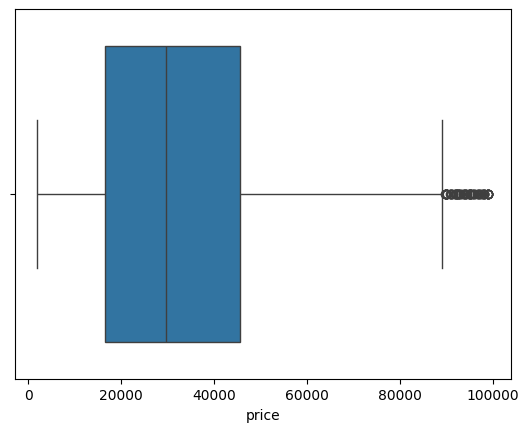

In [ ]:
sns.boxplot(data=new_data, x='price')
plt.show()

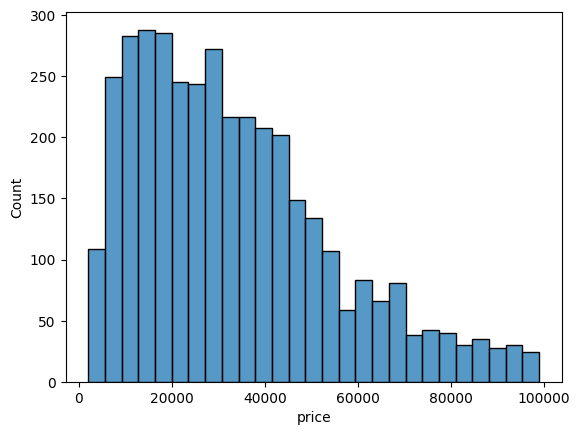

<Figure size 1000x1500 with 0 Axes>

In [ ]:
#Plot a brand with price
sns.histplot(x='price', data=new_data, )
plt.figure(figsize=(10,15))
plt.show()

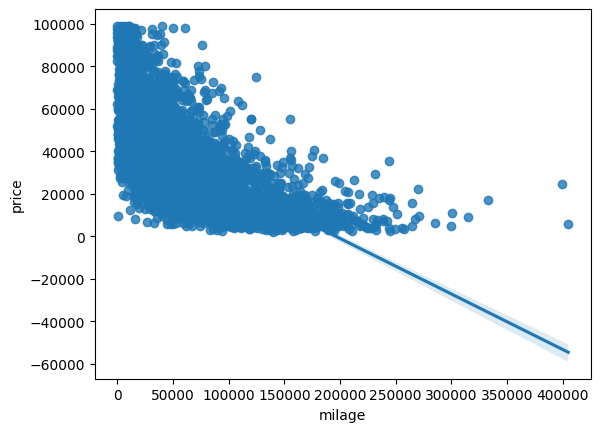

In [ ]:
#Plot price by milage
sns.regplot(x='milage', y='price', data=new_data,)
plt.show()

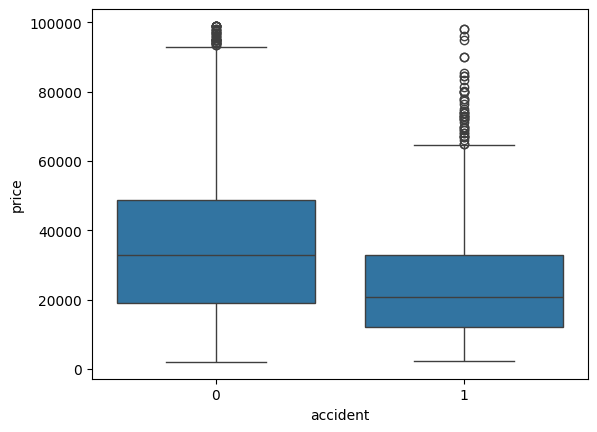

In [ ]:
#Plot price and accident
sns.boxplot(x='accident', y='price', data=new_data)
plt.show()

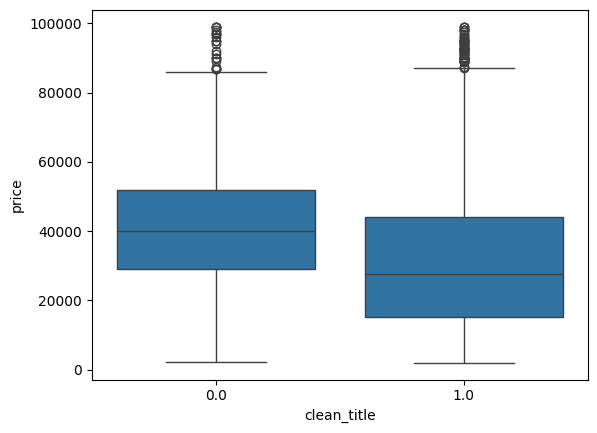

In [ ]:
#Plot price and clean title
sns.boxplot(x='clean_title', y='price', data=new_data)
plt.show()

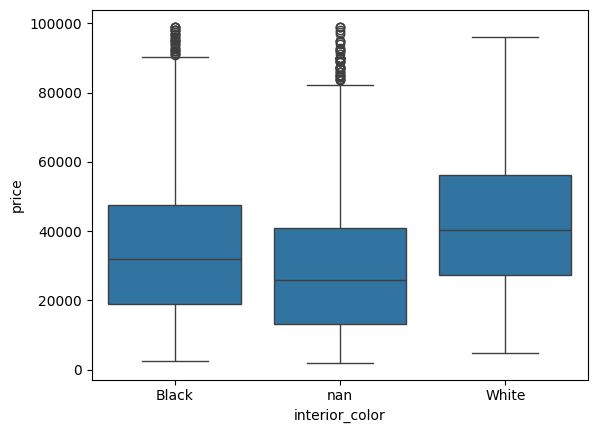

In [ ]:
#Plot price and interior_color
sns.boxplot(x='interior_color', y='price', data=new_data)
plt.show()

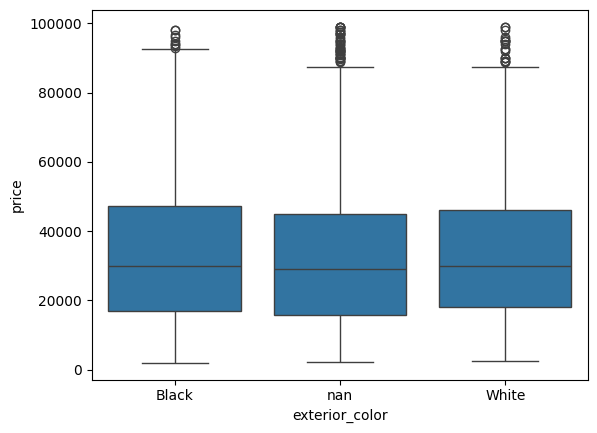

In [ ]:
#Plot exterior_color and price
sns.boxplot(x='exterior_color', y='price', data=new_data)
plt.show()

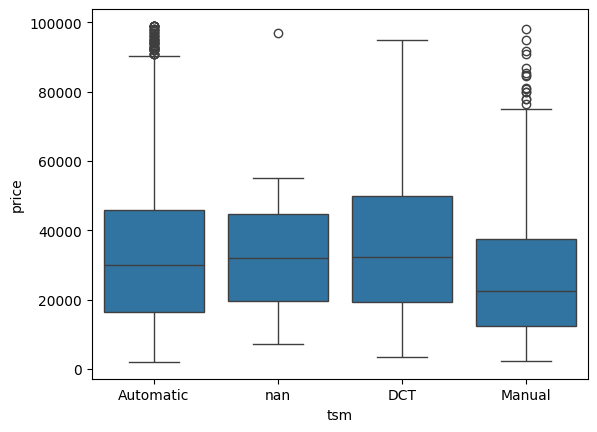

In [ ]:
#Plot tsm and price
sns.boxplot(x='tsm', y='price', data=new_data)
plt.show()

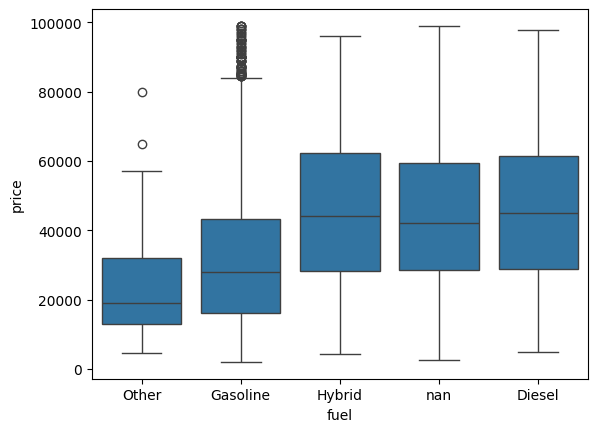

In [ ]:
#Plot fuel and price
sns.boxplot(x='fuel', y='price', data=new_data)
plt.show()

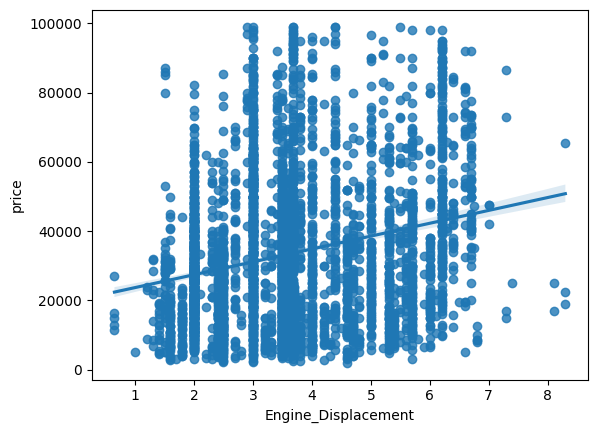

In [ ]:
#Plot Engine_Displacement and price
sns.regplot(x='Engine_Displacement', y='price', data=new_data)
plt.show()

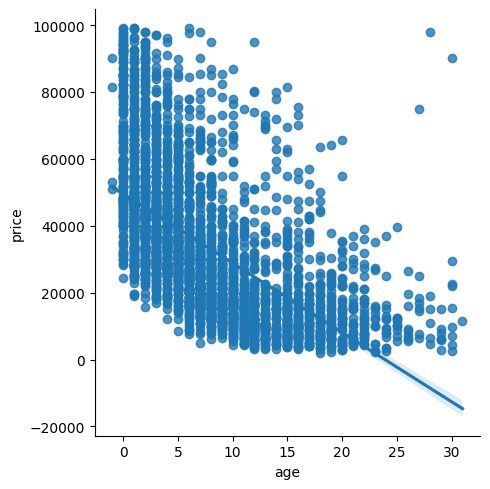

In [ ]:
#Plot price and age
sns.lmplot(x='age', y='price', data=new_data)
plt.show()

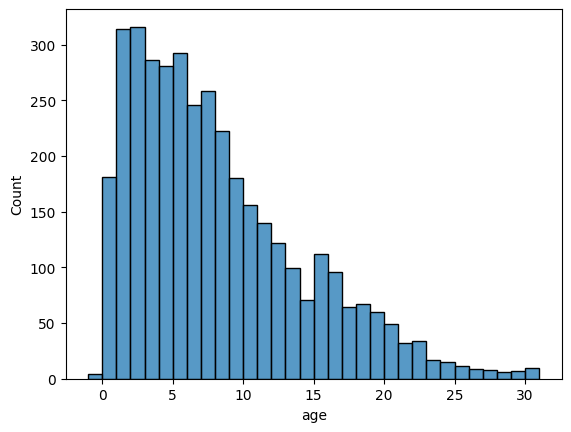

In [ ]:
#Plot histogram for age
sns.histplot(x='age', data=new_data)
plt.show()

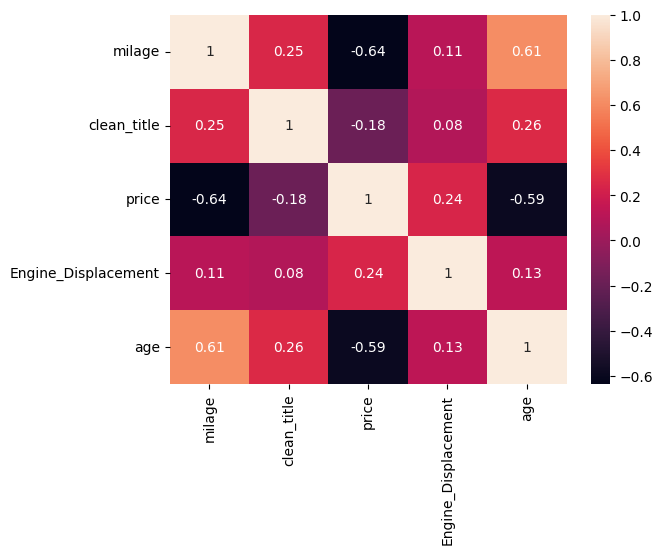

In [ ]:
numeric = new_data.select_dtypes(include=['int','float']).columns
sns.heatmap(new_data[numeric].corr(), annot=True)
plt.show()

# **CAUSATION AND CORRELATION STATS**

We then look at some statistical values to help us better understand relationships between our target variable and other features/columns.

In [ ]:
from scipy import stats

#Pearson coefficent for Engine_Displacement and Price
pearson_coef, p_value = stats.pearsonr(new_data['Engine_Displacement'], new_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.23907838994302694  with a P-value of P = 4.366538021026845e-50


In [ ]:
#Pearson coefficent for Age and Price
pearson_coef, p_value = stats.pearsonr(new_data['age'], new_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.5909371571044612  with a P-value of P = 0.0


In [ ]:
#Pearson coefficent for Milage and Price
pearson_coef, p_value = stats.pearsonr(new_data['milage'], new_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6369710080916948  with a P-value of P = 0.0


# **STANDARDIZATION**

Standardizing our data helps to scale all data to a more balanced range, making it easier for our model to work with and prevent overfitting.

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3765 entries, 0 to 4008
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                3765 non-null   object 
 1   milage               3765 non-null   int64  
 2   accident             3765 non-null   object 
 3   clean_title          3765 non-null   float64
 4   price                3765 non-null   int64  
 5   interior_color       3765 non-null   object 
 6   exterior_color       3765 non-null   object 
 7   tsm                  3765 non-null   object 
 8   fuel                 3765 non-null   object 
 9   Engine_Displacement  3765 non-null   float64
 10  age                  3765 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 353.0+ KB


In [ ]:
x_num = new_data.select_dtypes(include=['int','float'])
x_cat = new_data.select_dtypes(include=['object'])


In [ ]:
x_num

,milage,clean_title,price,Engine_Displacement,age
0,51000,1.0,10300,3.700000,10
1,34742,1.0,38005,3.800000,2
2,22372,0.0,54598,3.500000,1
3,88900,1.0,15500,3.500000,8
4,9835,0.0,34999,2.000000,2
...,...,...,...,...,...
4003,53705,1.0,25900,2.000000,5
4005,10900,1.0,53900,3.000000,1
4006,2116,0.0,90998,3.685693,1
4007,33000,1.0,62999,3.500000,3


In [ ]:
new_data.head()

,brand,milage,accident,clean_title,price,interior_color,exterior_color,tsm,fuel,Engine_Displacement,age
0,Ford,51000,1,1.0,10300,Black,Black,Automatic,Other,3.7,10
1,Hyundai,34742,1,1.0,38005,nan,nan,Automatic,Gasoline,3.8,2
2,Lexus,22372,0,0.0,54598,Black,nan,Automatic,Gasoline,3.5,1
3,INFINITI,88900,0,1.0,15500,Black,Black,Automatic,Hybrid,3.5,8
4,Audi,9835,0,0.0,34999,Black,White,Automatic,Gasoline,2.0,2


A side note concerning category encoders/target encoders. There is a lot of controversy on it's use since it exposes the dependent variable to the independent variables. If not used carefully, it may lead to overfitting. Try other methods/encoders along with this one.

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.8 MB/s eta 0:00:00


Everything here can be made easier and more compact with scikit-learn's pipeline. I decided to use the various transformers singularly here for the sake of practice and resorted to building a pipeline in the Python file.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from category_encoders.target_encoder import TargetEncoder

In [ ]:
scaler = StandardScaler()
target_encoder = TargetEncoder()

new_data[['milage', 'age', 'Engine_Displacement']] = scaler.fit_transform(new_data[['milage', 'age', 'Engine_Displacement']])

new_data['brand'] = target_encoder.fit_transform(new_data['brand'], new_data['price'])



In [ ]:
dummies = pd.get_dummies(new_data, columns=['accident', 'clean_title', 'interior_color',	'exterior_color',	'tsm',	'fuel'], drop_first=True, dtype=float)

new_data = pd.DataFrame(dummies)
#new_data = pd.concat([new_data, dummies], axis=1)
#cats = pd.get_dummies(new_data[['accident', 'clean_title', 'interior_color',	'exterior_color',	'tsm',	'fuel']], )
print(new_data)


             brand    milage  price  Engine_Displacement       age  \
0     34841.336815 -0.327862  10300             0.042658  0.372346   
1     19026.817625 -0.640036  38005             0.115355 -0.940124   
2     32845.127266 -0.877555  54598            -0.102736 -1.104183   
3     23137.763867  0.399863  15500            -0.102736  0.044228   
4     34368.190437 -1.118280  34999            -1.193192 -0.940124   
...            ...       ...    ...                  ...       ...   
4003  37500.964029 -0.275923  25900            -1.193192 -0.447948   
4005  34368.190437 -1.097831  53900            -0.466222 -1.104183   
4006  50277.275397 -1.266494  90998             0.032257 -1.104183   
4007  34841.336815 -0.673484  62999            -0.102736 -0.776066   
4008  38311.124309 -0.481472  40000            -1.193192 -0.776066   

      accident_1  clean_title_1.0  interior_color_White  interior_color_nan  \
0            1.0              1.0                   0.0                 0.0   
1

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3765 entries, 0 to 4008
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 3765 non-null   float64
 1   milage                3765 non-null   float64
 2   price                 3765 non-null   int64  
 3   Engine_Displacement   3765 non-null   float64
 4   age                   3765 non-null   float64
 5   accident_1            3765 non-null   float64
 6   clean_title_1.0       3765 non-null   float64
 7   interior_color_White  3765 non-null   float64
 8   interior_color_nan    3765 non-null   float64
 9   exterior_color_White  3765 non-null   float64
 10  exterior_color_nan    3765 non-null   float64
 11  tsm_DCT               3765 non-null   float64
 12  tsm_Manual            3765 non-null   float64
 13  tsm_nan               3765 non-null   float64
 14  fuel_Gasoline         3765 non-null   float64
 15  fuel_Hybrid           3765

In [ ]:
X = new_data.drop('price', axis=1)
y = new_data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
  y_preds = model.predict(X_test)
  mse = mean_squared_error(y_test, y_preds)
  mae = mean_absolute_error(y_test, y_preds)
  r2 = r2_score(y_test, y_preds)
  score = model.score(X_train, y_train)

  print('Training set metrics')
  print('-'*10)
  print('Score: ' + str(score))
  print('MSE: ' + str(mse))
  print('MAE: ' + str(mae))

  print(" ")

  print('Cross Validation')
  print('-'*10)
  cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv = 5)
  rmse_scores = np.sqrt(-cv_scores)
  print(rmse_scores)
  print(" ")
  print('Mean CV score: ' + str(rmse_scores.mean()))
  print('Standard deviation: ' + str(rmse_scores.std()))

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
evaluate_model(linear_model, X_train, X_test, y_train, y_test)

Training set metrics
----------
Score: 0.6693420339478006
MSE: 170389870.1872546
MAE: 9884.082866118984
 
Cross Validation
----------
[12105.79145869 12516.29234559 12100.96104185 12605.7038282
 12812.91406179]
 
Mean CV score: 12428.332547224645
Standard deviation: 282.2429078349658


In [ ]:
sample = ['Toyota', 60000, 'Yes', 'Yes', 'Black', 'Black', 'Automatic', 'Gasoline', 1.8, 5]

I have trained the model using a pipeline to save the model. You can find the Python file in the folder